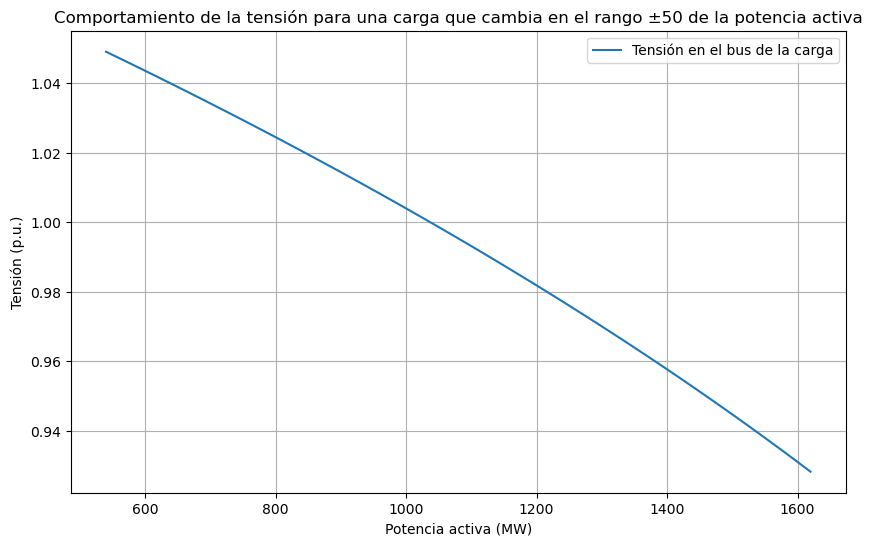

In [1]:
import numpy as np
import pandapower as pp
import matplotlib.pyplot as plt


net = pp.create_empty_network()

#Crear barras
line_data = {"r_ohm_per_km": 0.02, "x_ohm_per_km": 0.115, "c_nf_per_km": 19.1, "max_i_ka": 1., "type": "linea"}
pp.create_std_type(net, line_data, "linea")
b1 = pp.create_bus(net, vn_kv=500., name="Bus 1")
b2 = pp.create_bus(net, vn_kv=500, name="Bus 2")
pp.create_ext_grid(net, bus=b1, vm_pu=1, name="Conexion de malla")
pp.create_load(net, bus=b2, p_mw=1080, q_mvar=523.069, name="Carga")

#Crear linea
pp.create_line(net, from_bus=b1, to_bus=b2, length_km=500, std_type="linea", name="Linea 1", parallel=2)

#Potencia aparente inicial
s_initial = 1200  # en MVA
fp = 0.9  # factor de potencia

#Calcular la potencia activa y reactiva
p_initial = s_initial * fp  # en MW
q_initial = np.sqrt(s_initial**2 - p_initial**2)  # en MVar

#Crear un rango de potencias activas y reactivas que represente el cambio de ±50%
p_range = np.linspace(p_initial*0.5, p_initial*1.5, num=100)
q_range = np.linspace(q_initial*0.5, q_initial*1.5, num=100)

#Lista para guardar las tensiones
voltages = []

#Para cada potencia activa y reactiva en el rango
for p, q in zip(p_range, q_range):
    # Actualizar la carga en la red
    net.load.loc[0, 'p_mw'] = p
    net.load.loc[0, 'q_mvar'] = q

    # Ejecutar una simulación de flujo de potencia
    pp.runpp(net, max_iteration=2000, tolerance_mva=1e-9)

    # Guardar la tensión en el bus de la carga
    voltages.append(net.res_bus.vm_pu[b2])

#Graficar la tensión en función de la potencia aparente
plt.figure(figsize=(10, 6))
plt.plot(p_range, voltages, label='Tensión en el bus de la carga')
plt.xlabel('Potencia activa (MW)')
plt.ylabel('Tensión (p.u.)')
plt.title('Comportamiento de la tensión para una carga que cambia en el rango ±50 de la potencia activa')
plt.legend()
plt.grid(True)
plt.show()